# Financial Analysis
### using 'Alphavantage' API

In [1]:
# Import dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy.stats import linregress
from config import api_key
from pprint import pprint

In [2]:
# Input company stock ticker #
print("Enter company stock ticker:")
ticker = (input()).upper()

# Company Info reports API url #
info_url = ("https://www.alphavantage.co/query?function=OVERVIEW&symbol=" + ticker + "&apikey=" + api_key)

# Intraday Trading reports API url (interval set at 15 minutes) #
intraday_url = ("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=" + ticker + "&interval=15min&outputsize=full&apikey=" + api_key)

# Income Statement reports API url #
incstat_url = ("https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol=" + ticker + "&apikey=" + api_key)

# Balance Sheet reports API url #
balsheet_url = ("https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol=" + ticker + "&apikey=" + api_key)

# Cash Flow reports API url #
cf_url = ("https://www.alphavantage.co/query?function=CASH_FLOW&symbol="+ ticker + "&apikey="+ api_key)

# Get responses #
info_response = requests.get(info_url)
print(info_response)
info_data = info_response.json()

incstat_response = requests.get(incstat_url)
print(incstat_response)
incstat_data = incstat_response.json()

balsheet_response = requests.get(balsheet_url)
print(balsheet_response)
balsheet_data = balsheet_response.json()

cf_response = requests.get(cf_url)
print(cf_response)
cf_data = cf_response.json()

intraday_response = requests.get(intraday_url)
print(intraday_response)
intraday_data = intraday_response.json()

Enter company stock ticker:
vfc
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


### Company Information 

In [3]:
# Print company information #
co_name = info_data['Name']
pprint(info_data)

{'200DayMovingAverage': '82.9364',
 '50DayMovingAverage': '85.8274',
 '52WeekHigh': '90.79',
 '52WeekLow': '53.0806',
 'Address': '8505 East Orchard Road, Greenwood Village, CO, United States, '
            '80111',
 'AnalystTargetPrice': '94.23',
 'AssetType': 'Common Stock',
 'Beta': '0.974',
 'BookValue': '8.026',
 'CIK': '103379',
 'Country': 'USA',
 'Currency': 'USD',
 'Description': 'V.F. Corporation engages in the design, production, '
                'procurement, marketing, and distribution of branded lifestyle '
                'apparel, footwear, and related products for men, women, and '
                'children in the Americas, Europe, and the Asia-Pacific. It '
                'operates through four segments: Outdoor, Active, and Work. '
                'The company offers outdoor, merino wool and other natural '
                'fibers-based, lifestyle, and casual apparel; equipment; '
                'accessories; outdoor lifestyle, performance-based, youth '
         

#### Intraday Report <em>15 minute</em> intervals

In [4]:
# Generate Intraday reportings data frame
intraday15_df = pd.DataFrame(intraday_data['Time Series (15min)'])
intraday15_df = intraday15_df.T
intraday15_df

,1. open,2. high,3. low,4. close,5. volume
2021-05-19 18:15:00,84.6900,84.6900,84.6900,84.6900,100
2021-05-19 16:15:00,84.7000,84.7000,84.7000,84.7000,23832
2021-05-19 16:00:00,84.5100,84.7500,84.3700,84.7300,378786
2021-05-19 15:45:00,84.4500,84.5300,84.0900,84.5100,130927
2021-05-19 15:30:00,84.1400,84.5200,84.1400,84.4200,82098
...,...,...,...,...,...
2021-04-08 10:45:00,83.0400,83.4500,82.9500,83.4200,71879
2021-04-08 10:30:00,83.2600,83.3200,82.9600,83.0000,78134
2021-04-08 10:15:00,83.4600,83.5300,83.1350,83.2800,124278
2021-04-08 10:00:00,83.6200,83.7100,83.2600,83.4400,52599


#### Income Statement <em>Quarterly</em> reportings data frames

In [5]:
# Generate Income Statement quarterly reportings as Pandas data frames #
incstat_quart_report_df = pd.DataFrame(incstat_data['quarterlyReports'])

# Convert columns to relevant data types - e.g. 'fiscalDateEnding' column as Time series, 'totalRevenue' as Numeric #  
incstat_quart_report_df.iloc[:, 2: ] = incstat_quart_report_df.iloc[:, 2: ].apply(pd.to_numeric, errors='ignore')
incstat_quart_report_df.iloc[:,0] = incstat_quart_report_df.iloc[:,0].apply(pd.to_datetime, errors='ignore')
incstat_quart_report_df.head(10)

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2020-12-31,USD,318307000,2972141000,2653834000,1345024000,411999000,1214518000,None,1315577000,...,None,65727000,406288000,59048000,34315000,327659000,310935000,411999000,477726000,347240000
1,2020-09-30,USD,293060000,2607024000,2313964000,1282406000,319948000,1005970000,None,1031558000,...,None,75827000,307137000,50415000,34107000,243246000,194605000,319948000,395775000,256722000
2,2020-06-30,USD,-328485000,1076293000,1404778000,506951000,-246809000,816151000,None,905972000,...,None,63026000,-320816000,-35203000,29262000,-277742000,-252196000,-246809000,-183783000,-285613000
3,2020-03-31,USD,-27039000,2102421000,2129460000,986266000,-256761000,1049693000,None,1670252000,...,None,72972000,-390381000,93395000,86574000,-483086000,-519362000,-256761000,-183789000,-483776000
4,2019-12-31,USD,441749000,3155723000,2713974000,1351653000,540039000,1264031000,None,1365553000,...,None,69488000,543979000,78976000,22303000,421582000,500356000,540039000,609527000,465003000
5,2019-09-30,USD,547010000,3179758000,2632748000,1456317000,548562000,1174879000,None,1176431000,...,None,62923000,554029000,-94972000,20810000,625377000,585662000,548562000,611485000,649001000
6,2019-06-30,USD,29384000,2050654000,2021270000,896284000,95965000,1058405000,None,1126840000,...,None,62236000,69884000,20663000,22127000,65273000,70478000,95965000,158201000,49221000
7,2019-03-31,USD,8510456000,2357409000,1789932000,640885000,126360000,1030488000,None,1763775000,...,None,63680000,133710000,4906000,24428000,75621000,113294000,126360000,190040000,128804000
8,2018-12-31,USD,-2774054000,2983297000,2770344000,1464761000,476543000,1242131000,None,1313992000,...,None,62790000,548962000,85453000,28336000,374833000,439860000,476543000,539333000,463509000
9,2018-09-30,USD,3001760000,3001760000,2675704000,1545391000,510736000,1129013000,None,1130313000,...,None,76363000,577192000,70071000,28305000,390563000,526283000,510736000,587099000,507121000


In [6]:
# Print Income Statement categories #
incstat_categories = pd.DataFrame(incstat_quart_report_df.columns[2:])
incstat_categories

,0
0,grossProfit
1,totalRevenue
2,costOfRevenue
3,costofGoodsAndServicesSold
4,operatingIncome
5,sellingGeneralAndAdministrative
6,researchAndDevelopment
7,operatingExpenses
8,investmentIncomeNet
9,netInterestIncome


#### Balance Sheet <em>Quarterly</em> reportings data frames

In [7]:
# Generate Balance Sheet quarterly reportings as Pandas data frames #
balsheet_quart_report_df = pd.DataFrame(balsheet_data['quarterlyReports'])

# Convert columns to relevant data types - e.g. 'fiscalDateEnding' column as Time series, 'totalRevenue' as Numeric #
balsheet_quart_report_df.iloc[:, 2: ] = balsheet_quart_report_df.iloc[:, 2: ].apply(pd.to_numeric, errors='ignore')
balsheet_quart_report_df.iloc[:,0] = balsheet_quart_report_df.iloc[:,0].apply(pd.to_datetime, errors='ignore')
balsheet_quart_report_df.head(10)

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
0,2020-12-31,USD,13744341000,7285219000,3254236000,3853639000,1075983000,1411565000,6459122000,955845000,...,1006000,None,299748000,120185000,1109937000,3138174000,None,300495000,97746000,390985837
1,2020-09-30,USD,12941266000,6680206000,1877398000,2677398000,1434843000,1606479000,6261060000,933990000,...,1127000,None,13237000,114356000,1102216000,2945238000,None,-44953000,97491000,389964718
2,2020-06-30,USD,12479045000,6261137000,2145111000,2845111000,1402858000,934984000,6217908000,957309000,...,1025000,None,19256000,91283000,1136692000,2912598000,None,-298088000,97410000,389641245
3,2020-03-31,USD,11133251000,5027016000,1369028000,1369028000,1293912000,1308051000,6106235000,954406000,...,1018000,None,1228812000,126781000,1123113000,3357334000,None,7309000,97203000,388812158
4,2019-12-31,USD,10814262000,4155698000,540029000,540029000,1254460000,1539923000,6462262000,867205000,...,60678000,None,56001000,68910000,1128834000,4567590000,None,1182228000,98632000,394528067
5,2019-09-30,USD,11270355000,4775207000,469912000,469912000,1590027000,1881374000,6307491000,832237000,...,489307000,None,484321000,50634000,1106791000,4647619000,None,1405988000,99716000,398865790
6,2019-06-30,USD,10401964000,3990855000,560882000,560882000,1381513000,1211347000,6220849000,826570000,...,72726000,None,67658000,63443000,1139512000,4151614000,None,931134000,99481000,397922120
7,2019-03-31,USD,10356785000,4673457000,402226000,402226000,1173102000,1372625000,6014393000,876093000,...,5263000,None,656939000,18590000,1234881000,4298516000,None,1179601000,99206000,396824662
8,2018-12-31,USD,10284310000,4612091000,451978000,451978000,1401621000,1566202000,5198180000,902665000,...,5576000,None,674676000,53340000,1239503000,4300624000,None,1258327000,98868000,395472173
9,2018-09-30,USD,11130425000,5417954000,266788000,266788000,1723057000,1961274000,5230617000,893811000,...,5885000,None,1564899000,11358000,1246962000,4179556000,None,1147787000,99290000,397161808


In [8]:
# Print Balance Sheet categories #
balsheet_categories = pd.DataFrame(balsheet_quart_report_df.columns[2:])
#balsheet_categories

#### Cash Flow <em>Quarterly</em> reportings data frames

In [9]:
# Generate Balance Sheet quarterly reportings as Pandas data frames #
cf_quart_report_df = pd.DataFrame(cf_data['quarterlyReports'])

# Convert columns to relevant data types - e.g. 'fiscalDateEnding' column as Time series, 'totalRevenue' as Numeric #
cf_quart_report_df.iloc[:, 2: ] = cf_quart_report_df.iloc[:, 2: ].apply(pd.to_numeric, errors='ignore')
cf_quart_report_df.iloc[:,0] = cf_quart_report_df.iloc[:,0].apply(pd.to_datetime, errors='ignore')
cf_quart_report_df.head(10)

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,...,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome
0,2020-12-31,USD,1059248000,131527000,None,44179000,-610829000,4300000,53564000,-228601000,...,191266000,None,None,None,None,7221000,None,1347860000,None,347240000
1,2020-09-30,USD,85996000,None,None,None,None,4500000,43310000,-648190000,...,186892000,None,None,None,None,-7221000,None,266646000,None,256722000
2,2020-06-30,USD,-3188000,74227000,None,-86685000,-272625000,4400000,82668000,-372754000,...,186746000,None,None,2996090000,None,-15634000,None,774318000,None,-285613000
3,2020-03-31,USD,32901000,416206000,None,-223450000,-38032000,798000,118537000,-170577000,...,186365000,None,None,1076632000,None,-500004000,None,809188000,None,-483776000
4,2019-12-31,USD,1207104000,98800000,None,-54198000,-716288000,7070000,85599000,-365626000,...,188694000,None,None,None,None,-415576000,None,76524000,None,465003000
5,2019-09-30,USD,-299298000,111300000,None,87348000,936797000,7263000,70554000,708059000,...,171066000,None,None,None,None,43460000,None,626410000,None,649001000
6,2019-06-30,USD,-66180000,104600000,None,-210886000,38713000,7269000,59146000,-165909000,...,202538000,None,None,None,None,7199000,None,57042000,None,49221000
7,2019-03-31,USD,227560000,372323000,None,-24049000,-70613000,-2800000,46228000,-108085000,...,201885000,None,None,None,None,61826000,None,17007000,14811000,128804000
8,2018-12-31,USD,1333712000,200000,None,41118000,-701979000,7500000,60482000,-387097000,...,201325000,None,None,None,None,-142806000,None,162871000,None,463509000
9,2018-09-30,USD,-174193000,11900000,None,270832000,1023694000,7900000,78294000,778771000,...,182334000,None,None,None,None,76100000,None,510736000,None,507121000


In [10]:
# Print Cash Flow categories #
cf_categories = pd.DataFrame(cf_quart_report_df.columns[2:])
cf_categories

,0
0,operatingCashflow
1,paymentsForOperatingActivities
2,proceedsFromOperatingActivities
3,changeInOperatingLiabilities
4,changeInOperatingAssets
5,depreciationDepletionAndAmortization
6,capitalExpenditures
7,changeInReceivables
8,changeInInventory
9,profitLoss


## Book Value

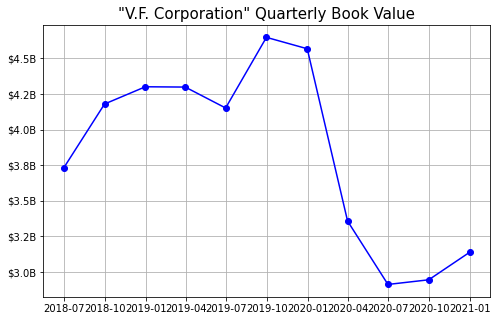

In [11]:
bookval_quart = (balsheet_quart_report_df.iloc[:, 2]) - (balsheet_quart_report_df.iloc[:, 19])
bookval_quart = pd.DataFrame(bookval_quart)
bookval_quart.columns = ['Quarterly Book Value']
bookval_quart['Fiscal Date Ending'] = balsheet_quart_report_df.iloc[: , 0]
bookval_quart = bookval_quart[['Fiscal Date Ending', 'Quarterly Book Value']]

# plot Quarterly Accounting Value

def billions(x, pos):
    return '${:1.1f}B'.format(x*1e-9)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(bookval_quart['Fiscal Date Ending'],
       bookval_quart['Quarterly Book Value'],
       marker = 'o',
        color = 'blue')
ax.yaxis.set_major_formatter(billions)
ax.set_title(f'"{co_name}" Quarterly Book Value', fontsize = 15)
ax.grid()
plt.savefig(f'../visualizations/{co_name}bookval_quart_plot.png')
plt.show()

## Return On Sales Ratio 

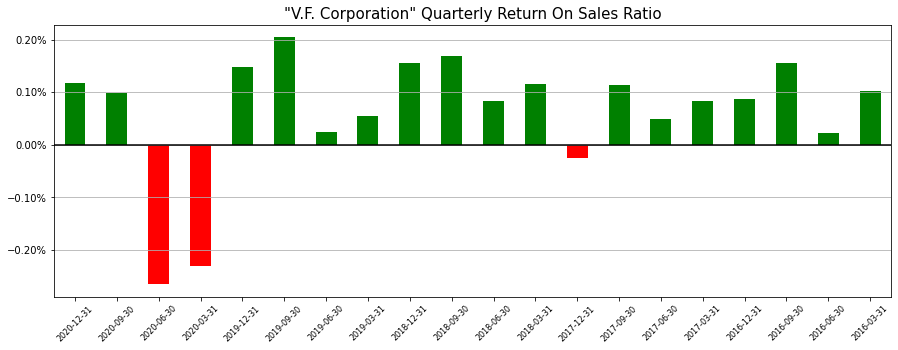

In [12]:
# Creating Quarterly Return On Sales Ratio data frame #
ros_ratio_quart = (incstat_quart_report_df.iloc[:, 25]) / (incstat_quart_report_df.iloc[:, 3])
ros_ratio_quart = pd.DataFrame(ros_ratio_quart)
ros_ratio_quart.columns = ['Quarterly Return On Sales Ratio']
ros_ratio_quart['Fiscal Date Ending'] = incstat_quart_report_df.iloc[: , 0]
ros_ratio_quart['Fiscal Date Ending'] = pd.to_datetime(ros_ratio_quart['Fiscal Date Ending']).dt.date
ros_ratio_quart = ros_ratio_quart[['Fiscal Date Ending', 'Quarterly Return On Sales Ratio']]

# First - plot Return On Sales Ratio #
ros_ratio_quart['values'] = ros_ratio_quart['Quarterly Return On Sales Ratio'] > 0

fig, ax = plt.subplots(figsize=(15, 5))
ros_ratio_quart['Quarterly Return On Sales Ratio'].plot(kind='bar', color = ros_ratio_quart['values'].map({True: 'g', False: 'r'}), ax=ax)
ax.axhline(0, color='k')
ax.set_xticklabels(ros_ratio_quart['Fiscal Date Ending'], rotation = 45, fontsize = 8)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title(f'"{co_name}" Quarterly Return On Sales Ratio', fontsize = 15)
ax.grid(axis = 'y')
plt.savefig(f'../visualizations/{co_name}ros_ratio_graph.png')
plt.show()

## Free Cash Flow v. Net Income

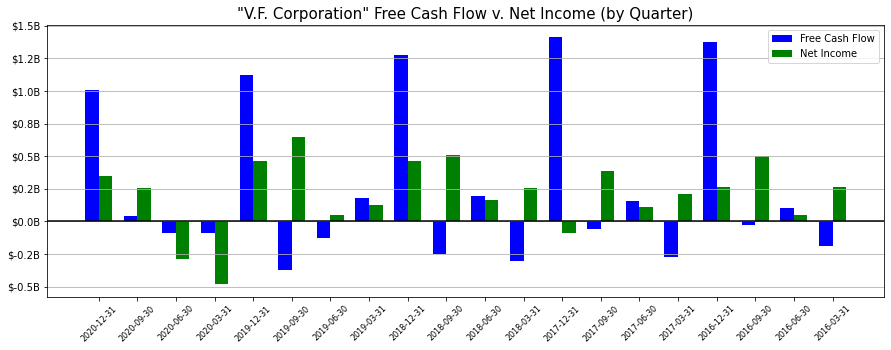

In [13]:
# Generate Quartertly Free Cash Flow v. Net Income #
fcf_quart_data = pd.DataFrame(cf_quart_report_df[['operatingCashflow', 'capitalExpenditures']])
fcf_quart = (fcf_quart_data.operatingCashflow) - (fcf_quart_data.capitalExpenditures)
fcf_quart = pd.DataFrame(fcf_quart)
fcf_quart.columns = ['Free Cash Flow']
fcf_quart['Fiscal Date Ending'] = cf_quart_report_df.iloc[:, 0]
fcf_quart['Fiscal Date Ending'] = pd.to_datetime(fcf_quart['Fiscal Date Ending']).dt.date
fcf_quart['Net Income'] = cf_quart_report_df.iloc[:, 28]
fcf_quart = fcf_quart[['Fiscal Date Ending', 'Free Cash Flow', 'Net Income']]
fcf_quart


labels = fcf_quart['Fiscal Date Ending']
fcf = fcf_quart['Free Cash Flow']
net_inc = fcf_quart['Net Income']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

def billions(x, pos):
    return '${:1.1f}B'.format(x*1e-9)

fig, ax = plt.subplots(figsize = (15, 5))
rects1 = ax.bar(x - width/2, fcf, width, label='Free Cash Flow', color='blue')
rects2 = ax.bar(x + width/2, net_inc, width, label='Net Income', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.axhline(0, color='k')
ax.set_title(f'"{co_name}" Free Cash Flow v. Net Income (by Quarter)', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation= 45, fontsize = 8)
ax.yaxis.set_major_formatter(billions)
ax.grid(axis = 'y')
ax.legend()
plt.savefig(f'../visualizations/{co_name}fcf_netinc_graph.png')
plt.show()

## Linear Regression Analysis - High & Low Difference v. Stock Volume

In [14]:
high = pd.to_numeric(intraday15_df['2. high'])
low = pd.to_numeric(intraday15_df['3. low'])
volume = pd.to_numeric(intraday15_df['5. volume'])
highlow_diff_df = pd.DataFrame(high)
highlow_diff_df['low'] = low 
highlow_diff_df['volume'] = volume
highlow_diff_df = highlow_diff_df.rename(columns = {'2. high' : 'high'})
highlow_diff_df['difference'] = (highlow_diff_df['high']) - (highlow_diff_df['low'])
highlow_diff_df = highlow_diff_df.sort_values('volume')

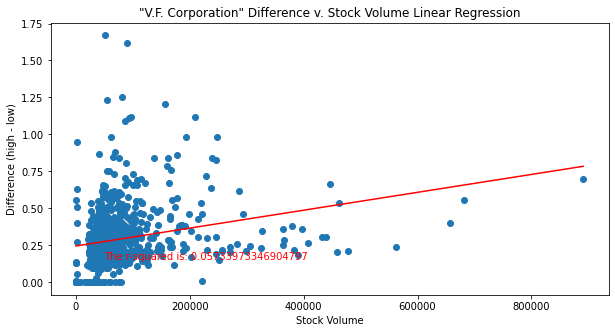

In [15]:
x_values = highlow_diff_df['volume']
y_values = highlow_diff_df['difference']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values,)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'"{co_name}" Difference v. Stock Volume Linear Regression')
plt.xlabel('Stock Volume')
plt.ylabel('Difference (high - low)')
plt.annotate(f"The r-squared is: {rvalue**2}", xy =(50000, .15), color="red")
plt.savefig(f'../visualizations/{co_name}linereg_plot.png')
plt.show()

### Generate Data Sources as HTML

In [16]:
intraday15_df_html = intraday15_df.to_html(classes=["table-bordered", "table-striped", "table-hover"])
intraday15 = open("intraday15_df_html.html", "w")
intraday15.write(intraday15_df_html)
intraday15.close()

In [17]:
incstat_quart_report_df_html = incstat_quart_report_df.to_html(classes=["table-bordered", "table-striped", "table-hover"])
incstat_quart_report = open("incstat_quart_df_html.html", "w")
incstat_quart_report.write(incstat_quart_report_df_html)
incstat_quart_report.close()

In [18]:
balsheet_quart_report_df_html = balsheet_quart_report_df.to_html(classes=["table-bordered", "table-striped", "table-hover"])
balsheet_quart_report = open("balsheet_quart_df_html.html", "w")
balsheet_quart_report.write(balsheet_quart_report_df_html)
balsheet_quart_report.close()

In [19]:
cf_quart_report_df_html = cf_quart_report_df.to_html(classes=["table-bordered", "table-striped", "table-hover"])
cf_quart_report = open("cf_quart_report_df_html.html", "w")
cf_quart_report.write(cf_quart_report_df_html)
cf_quart_report.close()

### Generate Data Sources as CSV

In [20]:
intraday15_df_csv = intraday15_df.to_csv(index=False)
intraday15_csv = open("csv/intraday15_df_csv.csv", "w")
intraday15_csv.write(intraday15_df_csv)
intraday15_csv.close()

In [21]:
incstat_quart_report_df_csv = incstat_quart_report_df.to_csv(index=False)
incstat_quart_report_csv = open("csv/incstat_quart_df_csv.csv", "w")
incstat_quart_report_csv.write(incstat_quart_report_df_csv)
incstat_quart_report_csv.close()

In [22]:
balsheet_quart_report_df_csv = balsheet_quart_report_df.to_csv(index=False)
balsheet_quart_report_csv = open("csv/balsheet_quart_df_csv.csv", "w")
balsheet_quart_report_csv.write(balsheet_quart_report_df_csv)
balsheet_quart_report_csv.close()

In [23]:
cf_quart_report_df_csv = cf_quart_report_df.to_csv(index=False)
cf_quart_report_csv = open("csv/cf_quart_report_df_csv.csv", "w")
cf_quart_report_csv.write(cf_quart_report_df_csv)
cf_quart_report_csv.close()